In [1]:
#БАЗОВЫЕ БИБЛИОТЕКИ
import pandas as pd
import numpy as np
import glob
import os

#CИСТЕМНЫЕ БИБЛИОТЕКИ
import sys
import glob

#ГРАФИЧЕСКИЕ БИБЛИОТЕКИ
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


#БИБЛИОТЕКА МАШИННОГО ОБУЧЕНИЯ
import sklearn

#БИБЛИОТЕКИ И МОДУЛИ СТАТИСТИЧЕСКИХ ВЫЧИСЛЕНИЙ
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error, classification_report, accuracy_score
from sklearn.decomposition import PCA
from scipy.stats import pearsonr


#БИБЛИОТЕКИ И МОДУЛИ ВЫБОРА МОДЕЛЕЙ
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, cross_validate, GridSearchCV


# БИБЛИОТЕКИ И МОДУЛИ ЛИНЕЙНЫХ МОДЕЛЕЙ
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings('ignore')

## 1. ЗАГРУЗКА ДАННЫХ

In [6]:
data = pd.read_csv('data.csv', sep = ';')
data[['NTG']] = data['NET_PAY_m']/data['THICKNESS_m']
data.dropna(axis=0, inplace=True)
data.drop(labels = 'WELL', inplace = True, axis = 1)
data.head()

,STATUS,THICKNESS_m,NET_PAY_m,NTG_v_v,PHIT_RES_v_v,PHID_RES_v_v,PERM_RES_UNCORR_ud,PERM_RES_CORR_ud,YOUNG_gpa,POIS_v_v,...,ANISO_v_v,TECH,L_m,Nstage,Mprop_t,V_m3_min,IP180_fact_t,Qcum_1000t,EUR_1000t,NTG
0,S,34.0,13.2,0.38824,0.1082,0.0553,3.385,3.397,9.08,0.28,...,1.1084,0.0,233,8,47.6,7.2,953,4.2,5.4,0.388235
1,S,38.1,13.6,0.35696,0.1056,0.0493,2.350,1.793,9.12,0.27,...,1.1002,0.0,292,8,62.8,4.6,889,3.5,7.1,0.356955
2,S,33.0,13.9,0.42121,0.1074,0.0528,2.400,2.394,10.10,0.29,...,1.1249,0.0,295,7,51.5,6.8,2108,6.8,10.2,0.421212
3,S,33.6,12.2,0.36310,0.1145,0.0532,2.672,2.725,9.03,0.30,...,1.1076,0.0,288,10,41.7,6.8,1303,5.9,8.2,0.363095
4,S,37.1,11.6,0.31267,0.1180,0.0736,5.025,5.004,9.04,0.29,...,1.1033,0.0,449,10,68.8,13.7,3444,3.8,4.5,0.312668


## 2. ПРЕДВАРИТЕЛЬНЫЙ АНАЛИЗ И СОЗДАНИЕ СОКРАЩЕННОЙ ВЫБОРКИ

<AxesSubplot:>

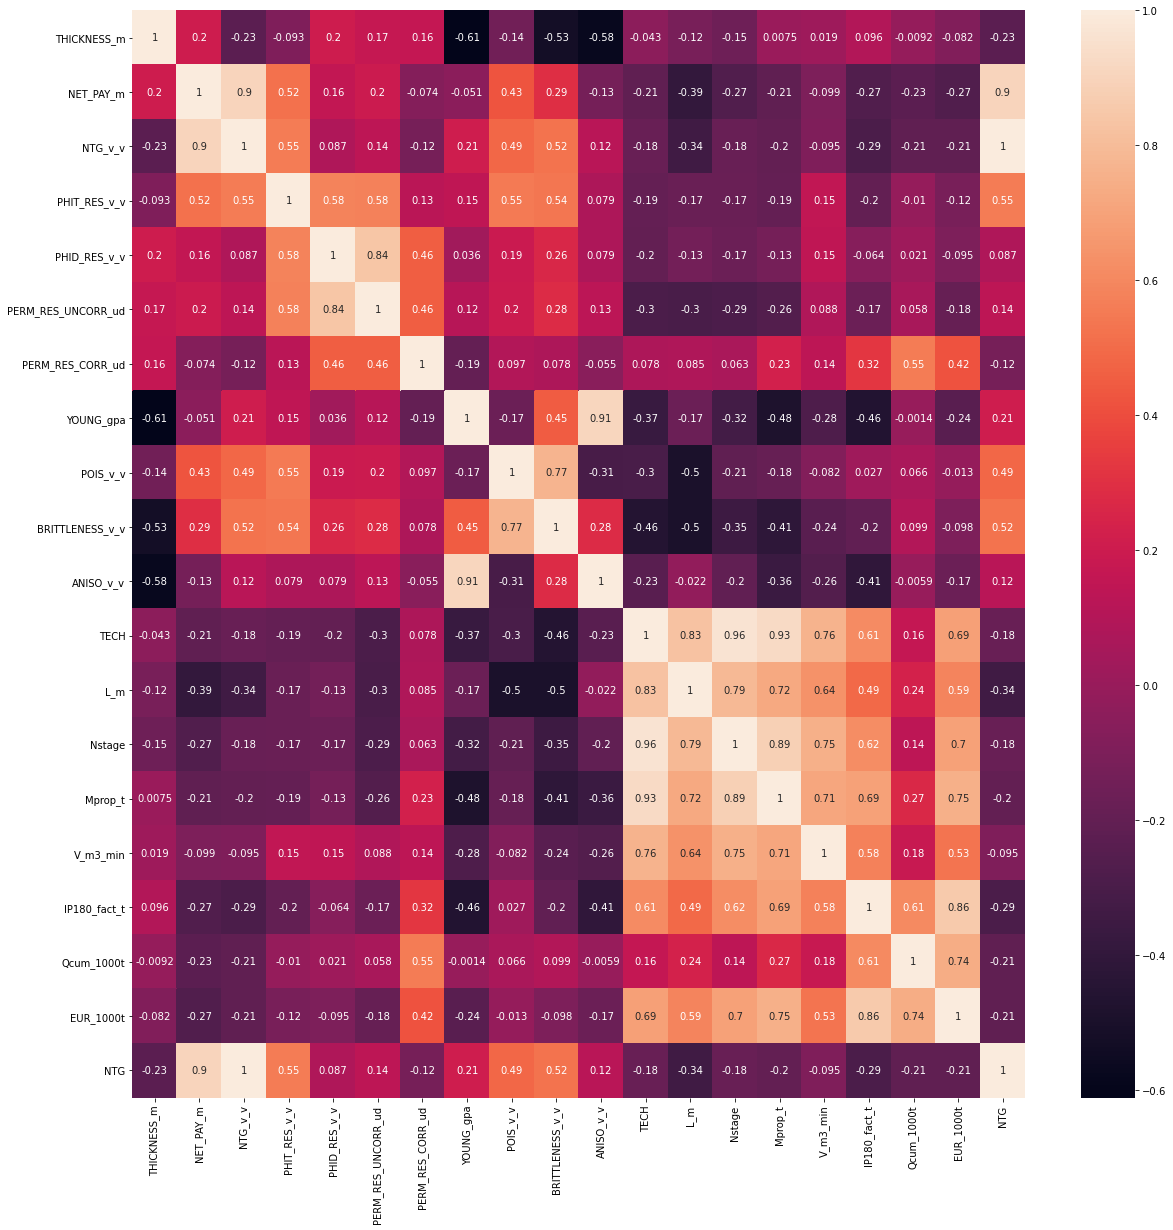

In [5]:
plt.figure(figsize = (20.0,20.0))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot = True)

In [8]:
data_short = data[['STATUS','THICKNESS_m','NET_PAY_m', 'NTG','PHIT_RES_v_v','PHID_RES_v_v', 'PERM_RES_CORR_ud', 'BRITTLENESS_v_v', 'ANISO_v_v', 'Nstage', 'Mprop_t', 'V_m3_min','IP180_fact_t']]
data_short.head(30)

,STATUS,THICKNESS_m,NET_PAY_m,NTG,PHIT_RES_v_v,PHID_RES_v_v,PERM_RES_CORR_ud,BRITTLENESS_v_v,ANISO_v_v,Nstage,Mprop_t,V_m3_min,IP180_fact_t
0,S,34.0,13.2,0.388235,0.1082,0.0553,3.397,0.3690,1.1084,8,47.6,7.2,953
1,S,38.1,13.6,0.356955,0.1056,0.0493,1.793,0.3459,1.1002,8,62.8,4.6,889
2,S,33.0,13.9,0.421212,0.1074,0.0528,2.394,0.4017,1.1249,7,51.5,6.8,2108
3,S,33.6,12.2,0.363095,0.1145,0.0532,2.725,0.4122,1.1076,10,41.7,6.8,1303
4,S,37.1,11.6,0.312668,0.1180,0.0736,5.004,0.3908,1.1033,10,68.8,13.7,3444
5,S,35.4,12.8,0.361582,0.1117,0.0537,4.411,0.3755,1.1039,9,67.5,7.6,2287
6,S,36.9,12.1,0.327913,0.1132,0.0550,3.552,0.3655,1.1175,9,40.5,11.4,2430
7,S,29.5,8.9,0.301695,0.1074,0.0490,1.363,0.3619,1.1201,15,61.7,7.1,3096
8,S,35.2,9.5,0.269886,0.1018,0.0545,2.812,0.3081,1.1269,15,63.0,8.0,3480
9,S,25.5,9.1,0.356863,0.1113,0.0609,5.777,0.4657,1.1583,15,70.0,8.1,4562


## 3. АНАЛИЗ МЕТОДОМ ГЛАВНЫХ КОМПОНЕНТ НА НЕНОРМИРОВАННЫХ ДАННЫХ

,Explained Variance,Cumulative Explained Variance
0,9.999274e-01,0.999927
1,7.029724e-05,0.999998
2,1.061513e-06,0.999999
3,5.474383e-07,0.999999
4,3.423606e-07,1.000000
5,2.327050e-07,1.000000
6,1.573587e-07,1.000000
7,3.618540e-11,1.000000
8,7.988685e-12,1.000000
9,1.343642e-12,1.000000


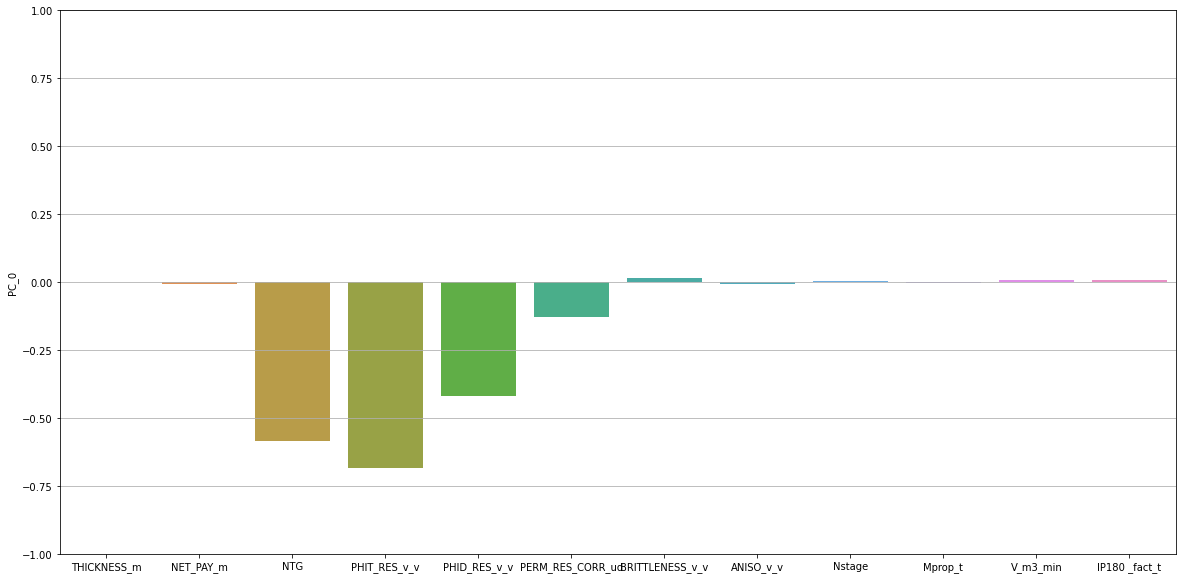

In [6]:
pca = PCA()
pca.fit(data_short)

vectors = pca.components_

pca_df = pd.DataFrame(data = vectors, index = ['THICKNESS_m','NET_PAY_m', 'NTG','PHIT_RES_v_v','PHID_RES_v_v', 'PERM_RES_CORR_ud', 'BRITTLENESS_v_v', 'ANISO_v_v', 'Nstage', 'Mprop_t', 'V_m3_min','IP180 _fact_t'],
            columns = ["PC_"+str(i) for i in range(0,vectors.shape[0])])


exp_variance = pca.explained_variance_ratio_
cum_exp_variance = np.cumsum(exp_variance)
pca_performance = pd.DataFrame(data = {'Explained Variance':exp_variance,'Cumulative Explained Variance':cum_exp_variance})


plt.figure(figsize = (20.0,10.0))
plt.ylim(-1,1)
plt.axes()
plt.grid()
sns.barplot(x=pca_df.index, y=pca_df['PC_0'] )

pca_performance.head(15)

## 4. АНАЛИЗ МЕТОДОМ ГЛАВНЫХ КОМПОНЕНТ НА НОРМИРОВАННЫХ ДАННЫХ

In [ ]:
sc = StandardScaler()
data_scaled = sc.fit_transform(data_short)
data_tr = pd.DataFrame(data_scaled,columns=['THICKNESS_m','NET_PAY_m', 'PHIT_RES_v_v','PHID_RES_v_v', 'PERM_RES_CORR_ud', 'BRITTLENESS_v_v', 'ANISO_v_v', 'Nstage', 'Mprop_t', 'V_m3_min','IP180 _fact_t'])

data_tr.head(30)

In [ ]:
pca = PCA()
pca.fit(data_tr)

vectors = pca.components_

pca_df = pd.DataFrame(data = vectors, index = ['THICKNESS_m','NET_PAY_m', 'PHIT_RES_v_v','PHID_RES_v_v', 'PERM_RES_CORR_ud', 'BRITTLENESS_v_v', 'ANISO_v_v', 'Nstage', 'Mprop_t', 'V_m3_min','IP180 _fact_t'],
            columns = ["PC_"+str(i) for i in range(0,vectors.shape[0])])


exp_variance = pca.explained_variance_ratio_
cum_exp_variance = np.cumsum(exp_variance)
pca_performance = pd.DataFrame(data = {'Explained Variance':exp_variance,'Cumulative Explained Variance':cum_exp_variance})


plt.figure(figsize = (20.0,10.0))
plt.ylim(-1,1)
plt.axes()
plt.grid()
sns.barplot(x=pca_df.index, y=pca_df['PC_0'] )

pca_performance.head(15)

## 5. ЛИНЕЙНЫЙ АНАЛИЗ НА НЕНОРМИРОВАННЫХ ДАННЫХ

In [ ]:
lm = LinearRegression()

features = ['THICKNESS_m','NET_PAY_m', 'PHIT_RES_v_v','PHID_RES_v_v', 'PERM_RES_CORR_ud', 'BRITTLENESS_v_v', 'ANISO_v_v', 'Nstage', 'Mprop_t', 'V_m3_min']
target = ['IP180_fact_t']

X = data_short[features]
Y = data_short[target]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

lm.fit(X_train, Y_train)
Y_hat = lm.predict(X_test).flatten()
Y_test = Y_test[target].to_numpy().flatten()
r,p = pearsonr(Y_test, Y_hat)


OLS_performance = pd.DataFrame({'Y_test':Y_test, 'Y_hat':Y_hat})


plt.figure(figsize = (15.0, 15.0))
sns.regplot(data = OLS_performance, x = 'Y_test', y = 'Y_hat')

db_coeff = pd.DataFrame({'Features':features, 'Weights':lm.coef_.flatten()})
db_coeff.head(10)

plt.figure(figsize = (20.0,10.0))
plt.axes()
plt.grid()
sns.barplot(x=db_coeff['Features'], y=db_coeff['Weights'] )

## 6. АНАЛИЗ ОШИБОК ПРИ ИЗМЕНЕНИИ РАЗМЕРА ОБУЧАЮЩЕЙ ВЫБОРКИ

In [ ]:
def linear_fit(X, Y, alpha):
    
    lm = LinearRegression()
    
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3)

    lm.fit(X_train, Y_train)
    Y_hat = lm.predict(X_test).flatten()
    Y_test = Y_test[target].to_numpy().flatten()
    
    r_train = lm.score(X_train, Y_train)
    r_test = pearsonr(Y_test, Y_hat)[0]
    
    return r_train, r_test
    
r_train = []
r_test = []
alpha = np.linspace(0.1,0.5,11)


for i in alpha:
    
    r_train.append(linear_fit(X,Y,i)[0])
    r_test.append(linear_fit(X,Y,i)[1])


plt.figure(figsize=(12.0,12.0))
sns.lineplot(x = alpha, y = r_train, )
sns.lineplot(x = alpha, y = r_test) 
plt.legend(labels = ['R2 тренировочной выборки', 'R2 тестовой выборки'])

## 7. ЛИНЕЙНЫЙ АНАЛИЗ НА НОРМИРОВАННЫХ ДАННЫХ

In [ ]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y,test_size = 0.2)

lm.fit(X_train, Y_train)
Y_hat = lm.predict(X_test).flatten()
Y_test = Y_test[target].to_numpy().flatten()
r,p = pearsonr(Y_test, Y_hat)


OLS_performance = pd.DataFrame({'Y_test':Y_test, 'Y_hat':Y_hat})
OLS_performance.head(10)

plt.figure(figsize = (15.0, 15.0))
sns.regplot(data = OLS_performance, x = 'Y_test', y = 'Y_hat')

#['THICKNESS_m','NET_PAY_m', 'PHIT_RES_v_v','PHID_RES_v_v', 'PERM_RES_CORR_ud', 'BRITTLENESS_v_v', 'ANISO_v_v', 'Nstage', 'Mprop_t', 'V_m3_min']

db_coeff = pd.DataFrame({'Features':features, 'Weights':lm.coef_.flatten()})
db_coeff.head(10)

plt.figure(figsize = (20.0,10.0))
plt.axes()
plt.grid()
sns.barplot(x=db_coeff['Features'], y=db_coeff['Weights'] )

## 8. АНАЛИЗ ОШИБОК ПРИ ИЗМЕНЕНИИ РАЗМЕРА ОБУЧАЮЩЕЙ ВЫБОРКИ

In [ ]:
r_train = []
r_test = []
alpha = np.linspace(0.1,0.5,11)


for i in alpha:
    
    r_train.append(linear_fit(X_scaled,Y,i)[0])
    r_test.append(linear_fit(X_scaled,Y,i)[1])


plt.figure(figsize=(12.0,12.0))
sns.lineplot(x = alpha, y = r_train, )
sns.lineplot(x = alpha, y = r_test) 
plt.legend(labels = ['R2 тренировочной выборки', 'R2 тестовой выборки'])

In [ ]:
sns.scatterplot(data = data, x = 'ANISO_v_v', y = 'IP180 _fact_t')

In [ ]:
data2 = data[['THICKNESS_m',"NET_PAY_m",'PHID_RES_v_v', 'PERM_RES_CORR_ud', 'BRITTLENESS_v_v', 'ANISO_v_v', 'Nstage', 'Mprop_t', 'V_m3_min', 'IP180 _fact_t']]
corr_matrix2 = data2.corr()

plt.figure(figsize = (20.0,20.0))
sns.heatmap(corr_matrix2, annot = True)

In [ ]:
data3 = data2.values
sc = StandardScaler()
data_scaled = sc.fit_transform(data3)
data_tr = pd.DataFrame(data_scaled,columns=['THICKNESS_m',"NET_PAY_m",'PHID_RES_v_v', 'PERM_RES_CORR_ud', 'BRITTLENESS_v_v', 'ANISO_v_v', 'Nstage', 'Mprop_t', 'V_m3_min', 'IP180 _fact_t'])

In [ ]:
data_tr.head()

In [ ]:
corr3 = data_tr.corr()
plt.figure(figsize = (20.0,20.0))
sns.heatmap(corr3, annot = True)

## 9. ЛИНЕЙНЫЙ АНАЛИЗ НА НОРМИРОВАННЫХ ДАННЫХ C L1-РЕГУЛЯРИЗАЦИЕЙ

<AxesSubplot:xlabel='Features', ylabel='Weights'>

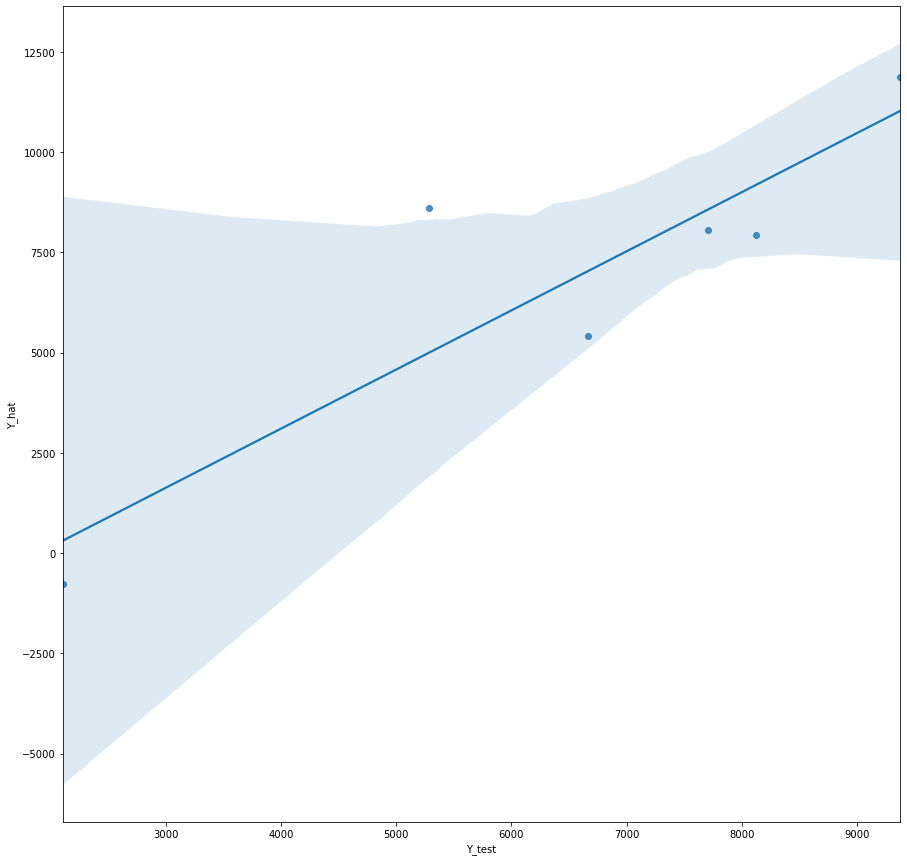

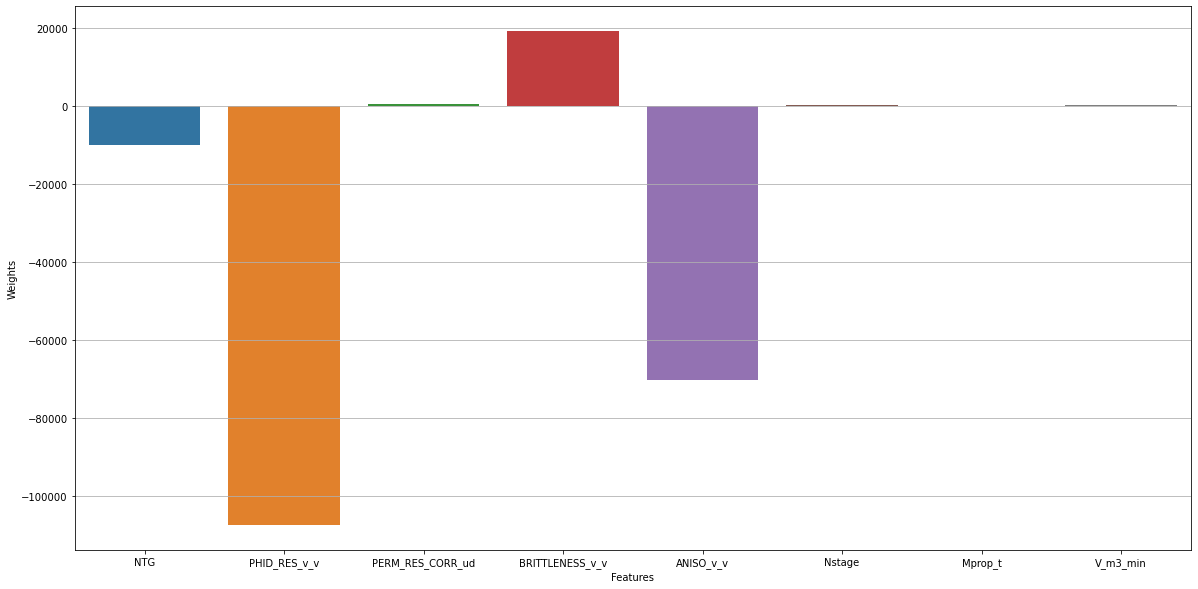

In [8]:
lm = Lasso(alpha=0.01)

features = ['NTG', 'PHID_RES_v_v', 'PERM_RES_CORR_ud', 'BRITTLENESS_v_v', 'ANISO_v_v', 'Nstage', 'Mprop_t', 'V_m3_min']
target = ['IP180_fact_t']

X = data_short[features]
Y = data_short[target]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

lm.fit(X_train, Y_train)
Y_hat = lm.predict(X_test).flatten()
Y_test = Y_test[target].to_numpy().flatten()
r,p = pearsonr(Y_test, Y_hat)


OLS_performance = pd.DataFrame({'Y_test':Y_test, 'Y_hat':Y_hat})


plt.figure(figsize = (15.0, 15.0))
sns.regplot(data = OLS_performance, x = 'Y_test', y = 'Y_hat')

db_coeff = pd.DataFrame({'Features':features, 'Weights':lm.coef_.flatten()})
db_coeff.head(10)

plt.figure(figsize = (20.0,10.0))
plt.axes()
plt.grid()
sns.barplot(x=db_coeff['Features'], y=db_coeff['Weights'] )

## 10. АНАЛИЗ ОШИБОК ПРИ ИЗМЕНЕНИИ РАЗМЕРА ОБУЧАЮЩЕЙ ВЫБОРКИ ПРИ РЕГУЛЯРИЗАЦИИ

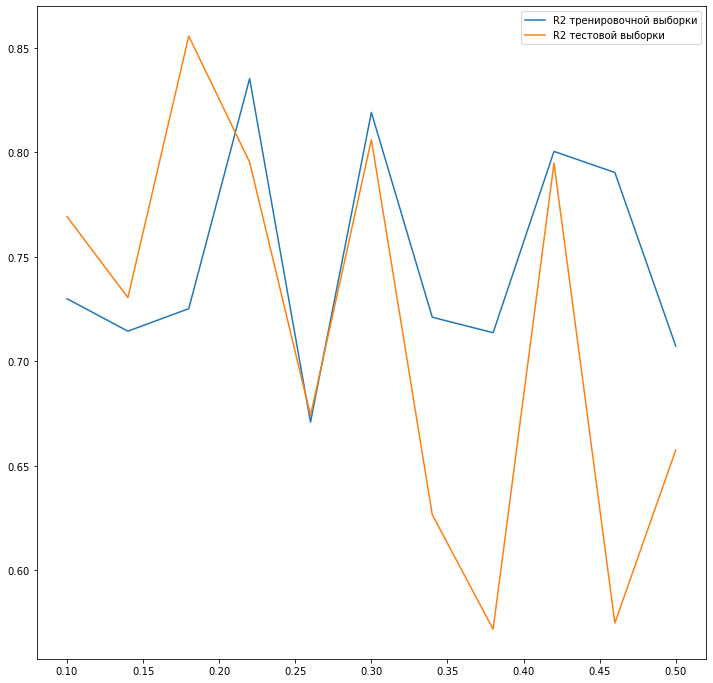

In [14]:
def linear_fit(X, Y, alpha):
    
    lm = Lasso(alpha=0.001)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3)

    lm.fit(X_train, Y_train)
    Y_hat = lm.predict(X_test).flatten()
    Y_test = Y_test[target].to_numpy().flatten()
    
    r_train = lm.score(X_train, Y_train)
    r_test = pearsonr(Y_test, Y_hat)[0]
    
    return r_train, r_test
    
r_train = []
r_test = []
alpha = np.linspace(0.1,0.5,11)


for i in alpha:
    
    r_train.append(linear_fit(X,Y,i)[0])
    r_test.append(linear_fit(X,Y,i)[1])


plt.figure(figsize=(12.0,12.0))
sns.lineplot(x = alpha, y = r_train, )
sns.lineplot(x = alpha, y = r_test) 
plt.legend(labels = ['R2 тренировочной выборки', 'R2 тестовой выборки'])

## 11. ЛИНЕЙНЫЙ АНАЛИЗ НА НОРМИРОВАННЫХ B ОТФИЛЬТРОВАННЫХ ДАННЫХ C L1-РЕГУЛЯРИЗАЦИЕЙ

<AxesSubplot:xlabel='Features', ylabel='Weights'>

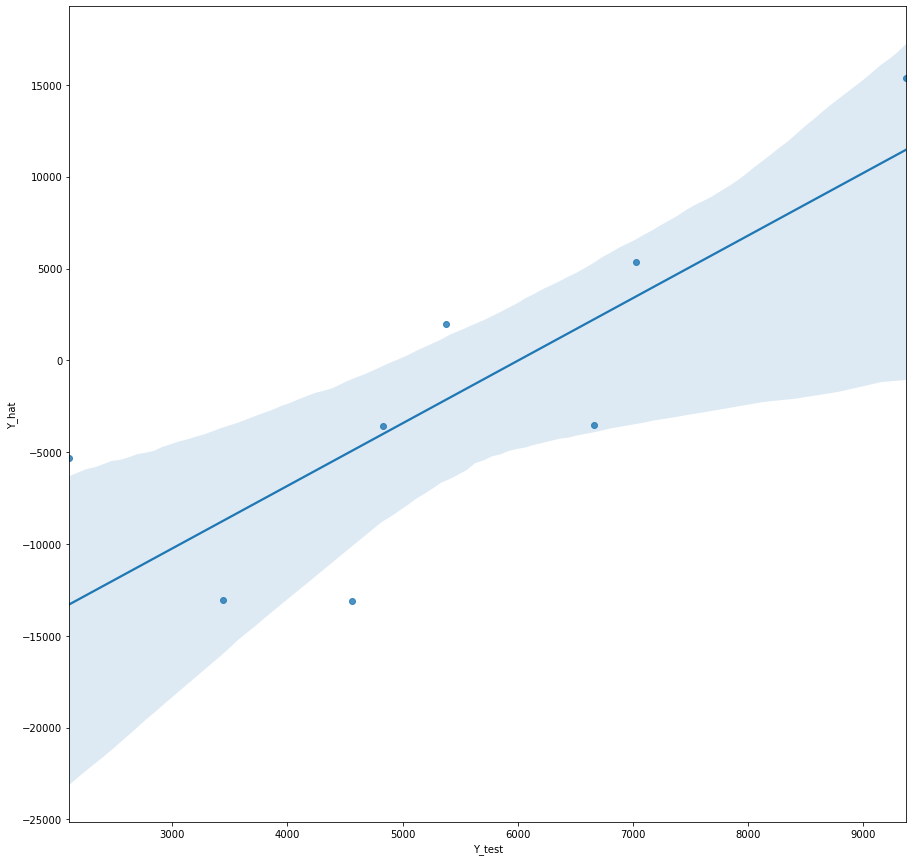

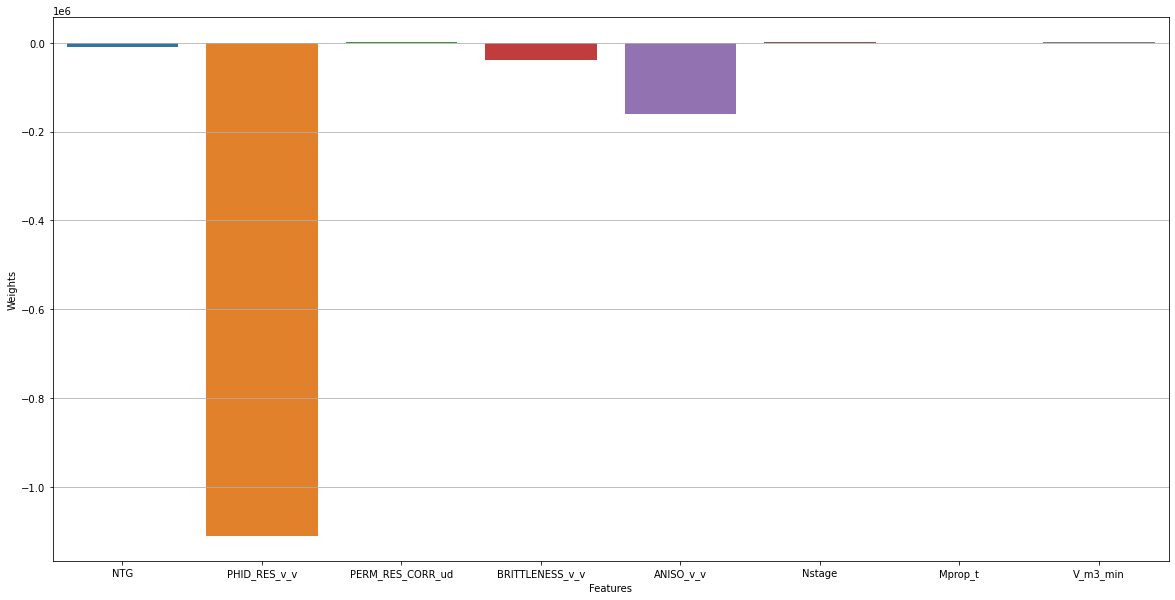

In [11]:
lm = Lasso(alpha=0.01)

data_short_filt = data_short[(data_short['STATUS'] == 'S')]

features = ['NTG', 'PHID_RES_v_v', 'PERM_RES_CORR_ud', 'BRITTLENESS_v_v', 'ANISO_v_v', 'Nstage', 'Mprop_t', 'V_m3_min']
target = ['IP180_fact_t']

X = data_short_filt[features]
Y = data_short_filt[target]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.35)

lm.fit(X_train, Y_train)
Y_hat = lm.predict(X_test).flatten()
Y_test = Y_test[target].to_numpy().flatten()
r,p = pearsonr(Y_test, Y_hat)


OLS_performance = pd.DataFrame({'Y_test':Y_test, 'Y_hat':Y_hat})


plt.figure(figsize = (15.0, 15.0))
sns.regplot(data = OLS_performance, x = 'Y_test', y = 'Y_hat')

db_coeff = pd.DataFrame({'Features':features, 'Weights':lm.coef_.flatten()})
db_coeff.head(10)

plt.figure(figsize = (20.0,10.0))
plt.axes()
plt.grid()
sns.barplot(x=db_coeff['Features'], y=db_coeff['Weights'] )

## 12. АНАЛИЗ ОШИБОК ПРИ ИЗМЕНЕНИИ РАЗМЕРА ОБУЧАЮЩЕЙ ВЫБОРКИ ПРИ РЕГУЛЯРИЗАЦИИ НА НОРМАЛИЗОВАННЫХ И ФИЛЬТРОВАННЫХ ДАННЫХ

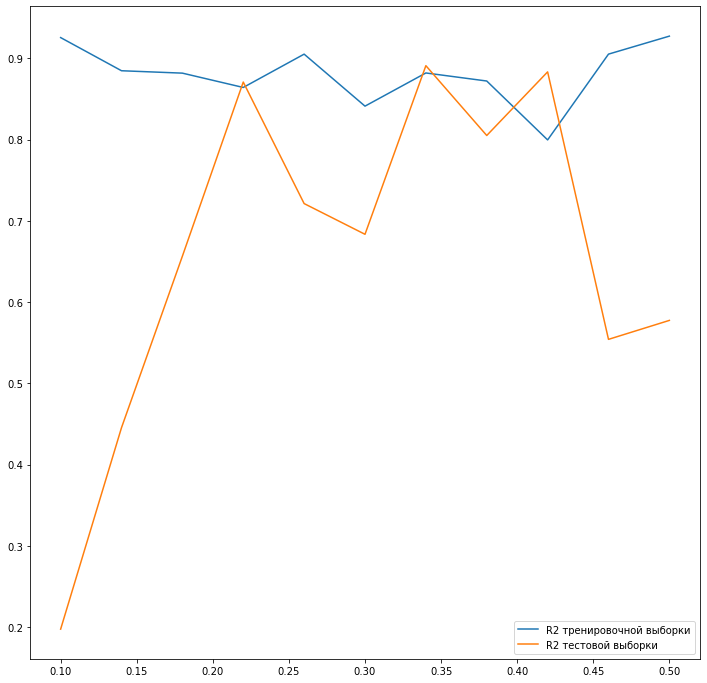

In [10]:
def linear_fit(X, Y, alpha):
    
    lm = Lasso(alpha=0.001)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3)

    lm.fit(X_train, Y_train)
    Y_hat = lm.predict(X_test).flatten()
    Y_test = Y_test[target].to_numpy().flatten()
    
    r_train = lm.score(X_train, Y_train)
    r_test = pearsonr(Y_test, Y_hat)[0]
    
    return r_train, r_test
    
r_train = []
r_test = []
alpha = np.linspace(0.1,0.5,11)


for i in alpha:
    
    r_train.append(linear_fit(X,Y,i)[0])
    r_test.append(linear_fit(X,Y,i)[1])


plt.figure(figsize=(12.0,12.0))
sns.lineplot(x = alpha, y = r_train, )
sns.lineplot(x = alpha, y = r_test) 
plt.legend(labels = ['R2 тренировочной выборки', 'R2 тестовой выборки'])